<a href="https://colab.research.google.com/github/Bijisha99/IMBD_Project_README/blob/main/Flight_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the kaggle.json file you downloaded
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bijisha","key":"9aaae12843a499db9a56e4146f00349d"}'}

In [ ]:
# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set the correct permissions
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d mahoora00135/flights

# Unzip the downloaded file
!unzip flights.zip


Dataset URL: https://www.kaggle.com/datasets/mahoora00135/flights
License(s): CC0-1.0
 49% 5.00M/10.3M [00:00<00:00, 42.2MB/s]
100% 10.3M/10.3M [00:00<00:00, 70.6MB/s]
Archive:  flights.zip
  inflating: flights.csv             


In [4]:
import os

# List all files in the current directory
print(os.listdir('.'))




['.config', 'sample_data']


In [5]:
!unzip flights.zip


unzip:  cannot find or open flights.zip, flights.zip.zip or flights.zip.ZIP.


In [6]:
!kaggle datasets download -d mahoora00135/flights


Dataset URL: https://www.kaggle.com/datasets/mahoora00135/flights
License(s): CC0-1.0
 49% 5.00M/10.3M [00:00<00:00, 50.2MB/s]
100% 10.3M/10.3M [00:00<00:00, 85.7MB/s]


In [7]:
import os

# List the files in the /content directory to verify
print(os.listdir('/content'))


['.config', 'flights.zip', 'sample_data']


In [8]:
!unzip /content/flights.zip -d /content


Archive:  /content/flights.zip
  inflating: /content/flights.csv    


In [9]:
import os

# List the files in the /content directory
print(os.listdir('/content'))


['.config', 'flights.csv', 'flights.zip', 'sample_data']


In [10]:
import pandas as pd

# Replace 'flights.csv' with the actual filename if it's different
df = pd.read_csv('/content/flights.csv')

# Display the first few rows to confirm
print(df.head())


   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute            time_hour                    name  
0      1400     5      15  2013-01-01

In [11]:
#Data overview
# Check data information
print("\nDataset Info:")
df.info()

# Basic statistics of numeric columns
print("\nData Summary:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  


In [12]:
#checking missing vales
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("\nMissing Values:")
print(missing_values[missing_values > 0])

print("\nMissing Value Percentage:")
print(missing_percentage[missing_percentage > 0])



Missing Values:
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
tailnum      2512
air_time     9430
dtype: int64

Missing Value Percentage:
dep_time     2.451184
dep_delay    2.451184
arr_time     2.587180
arr_delay    2.800081
tailnum      0.745896
air_time     2.800081
dtype: float64


In [13]:
#Removing Missing Values
# Drop rows with any missing values
df_cleaned = df.dropna()

print("\nCleaned Data Shape:", df_cleaned.shape)
print(df_cleaned.head())



Cleaned Data Shape: (327346, 21)
   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute            time_hour                    name  
0  

In [14]:
#Feature Engineering Flight Duration and Time of Day
# Create flight duration (handling time rollovers)
df_cleaned['flight_duration'] = (df_cleaned['arr_time'] - df_cleaned['dep_time']) % 2400

# Categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Create hour and time_of_day features
df_cleaned['hour'] = df_cleaned['dep_time'].floordiv(100)
df_cleaned['time_of_day'] = df_cleaned['hour'].apply(categorize_time)

print("\nSample of Cleaned Data with New Features:")
print(df_cleaned[['dep_time', 'arr_time', 'flight_duration', 'time_of_day']].head())



Sample of Cleaned Data with New Features:
   dep_time  arr_time  flight_duration time_of_day
0     517.0     830.0            313.0     Morning
1     533.0     850.0            317.0     Morning
2     542.0     923.0            381.0     Morning
3     544.0    1004.0            460.0     Morning
4     554.0     812.0            258.0     Morning


<ipython-input-14-e922a3d4e3e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['flight_duration'] = (df_cleaned['arr_time'] - df_cleaned['dep_time']) % 2400
<ipython-input-14-e922a3d4e3e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour'] = df_cleaned['dep_time'].floordiv(100)
<ipython-input-14-e922a3d4e3e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

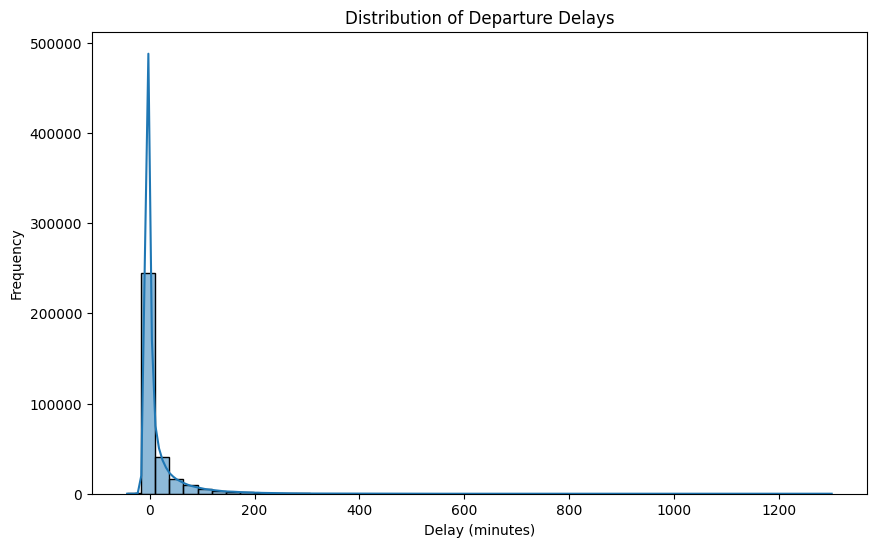

In [15]:
#Visualizations: Analyze Flight Delays and Routes
#Distribution of Departure Delays
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['dep_delay'].dropna(), bins=50, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()



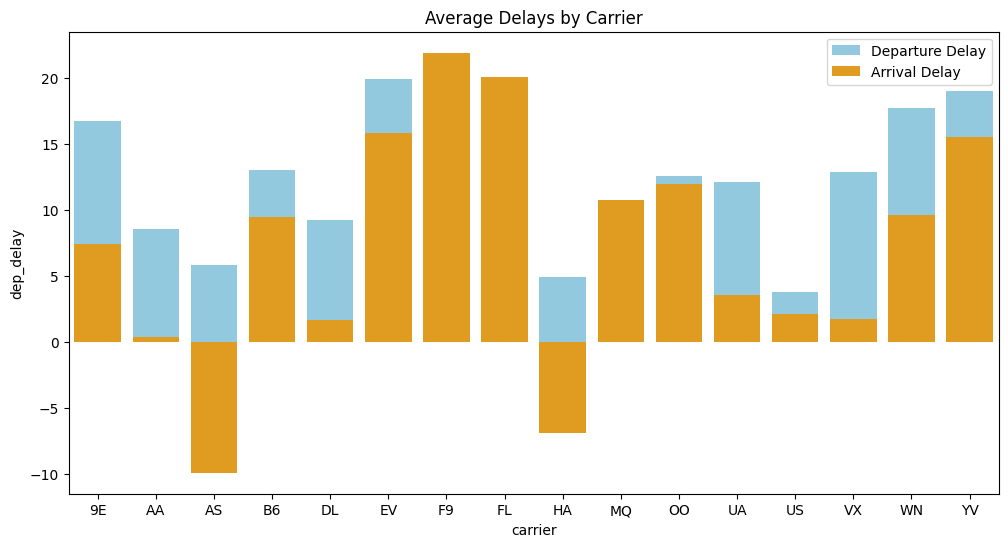

In [18]:
#Visualization: Average Delays by Carrier

import matplotlib.pyplot as plt
import seaborn as sns

# Group by carrier and calculate mean delays
carrier_delay = df.groupby('carrier')[['dep_delay', 'arr_delay']].mean().reset_index()

# Plot average delays by carrier
plt.figure(figsize=(12, 6))
sns.barplot(x='carrier', y='dep_delay', data=carrier_delay, color='skyblue', label='Departure Delay')
sns.barplot(x='carrier', y='arr_delay', data=carrier_delay, color='orange', label='Arrival Delay')
plt.legend(loc='upper right')
plt.title('Average Delays by Carrier')
plt.show()



In [21]:
#Model: Predicting Flight Delays (Classification)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df['is_delayed'] = (df['arr_delay'] > 15).astype(int)

# Prepare features and target variable
X = pd.get_dummies(df[['carrier', 'origin', 'month', 'day', 'hour', 'distance', 'dep_delay']], drop_first=True)
y = df['is_delayed']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 90.45%


In [ ]:
#Visualization: Top 10 Busiest Routes


<ipython-input-22-5a40b76fbf65>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='route', data=route_frequency, palette='coolwarm')


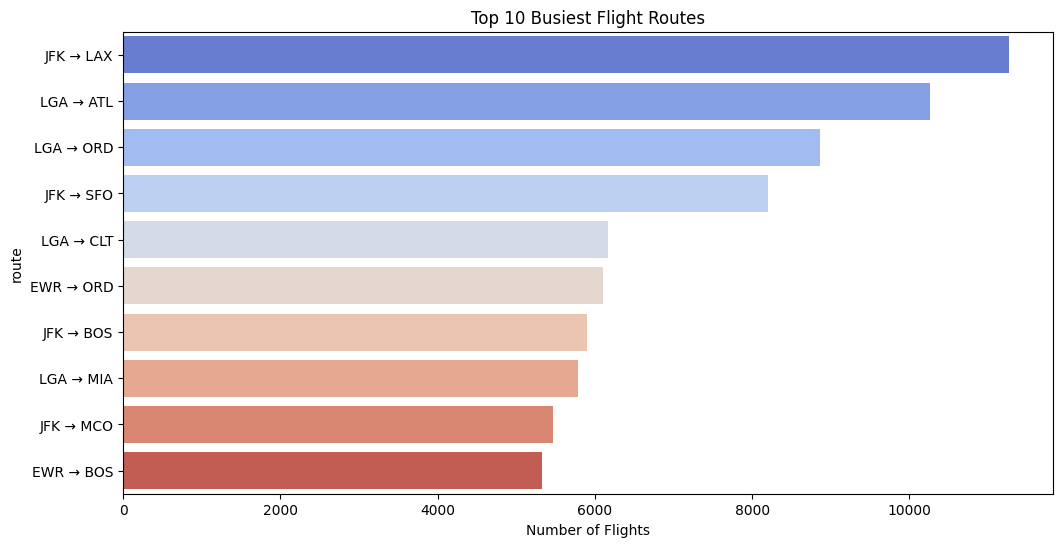

In [22]:
# Find the top 10 busiest routes
route_frequency = df.groupby(['origin', 'dest']).size().reset_index(name='count')
route_frequency = route_frequency.sort_values(by='count', ascending=False).head(10)

# Create route labels for plotting
route_frequency['route'] = route_frequency['origin'] + " → " + route_frequency['dest']

# Plot the busiest routes
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='route', data=route_frequency, palette='coolwarm')
plt.title('Top 10 Busiest Flight Routes')
plt.xlabel('Number of Flights')
plt.show()


<ipython-input-23-cf8b5a56d752>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='count', data=busiest_hours, palette='Blues')


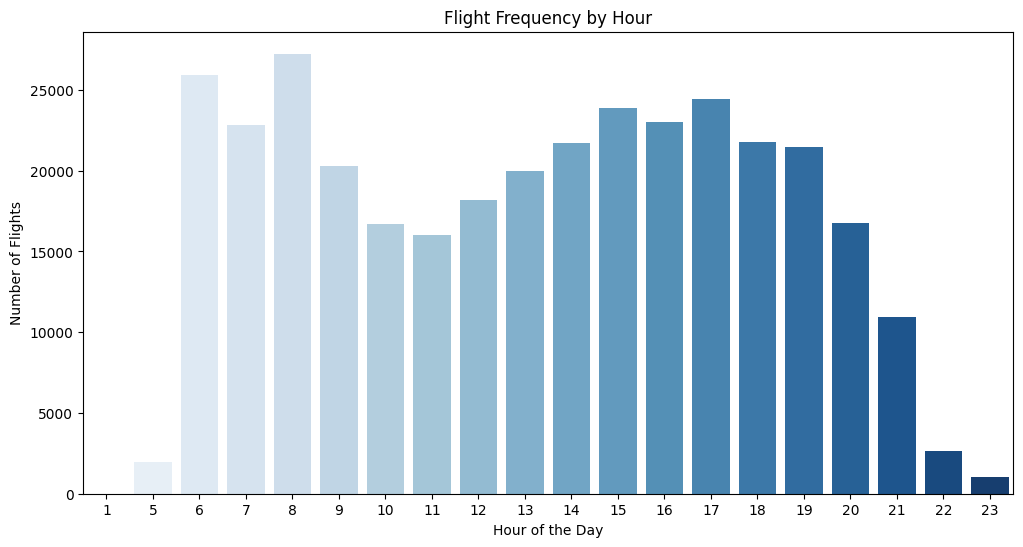

In [23]:
#Visualization: Flight Frequency by Hour
# Group flights by hour
busiest_hours = df.groupby('hour').size().reset_index(name='count')

# Plot flight frequency by hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=busiest_hours, palette='Blues')
plt.title('Flight Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.show()


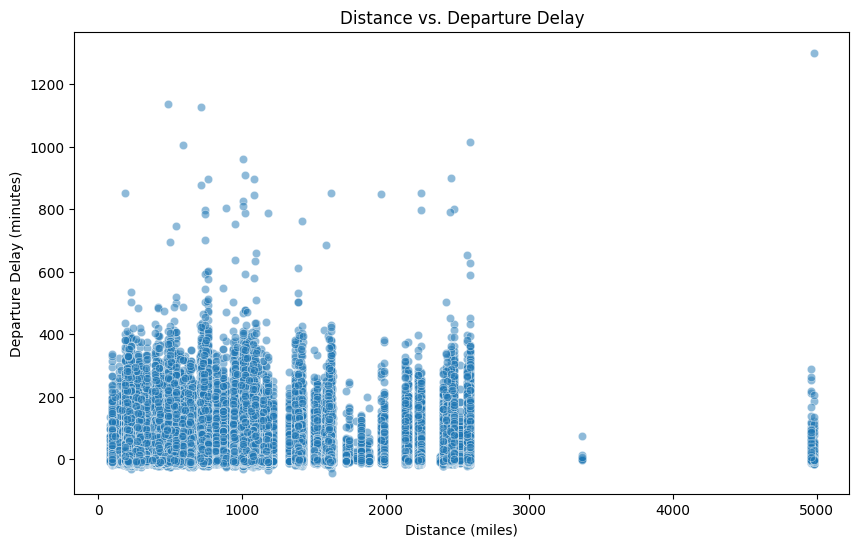

Correlation between Distance and Departure Delay: -0.02168090435164056


In [25]:
#Analysis: Impact of Distance on Delays
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['distance'], y=df_cleaned['dep_delay'], alpha=0.5)
plt.title('Distance vs. Departure Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

correlation = df_cleaned[['distance', 'dep_delay']].corr().iloc[0, 1]
print(f"Correlation between Distance and Departure Delay: {correlation}")


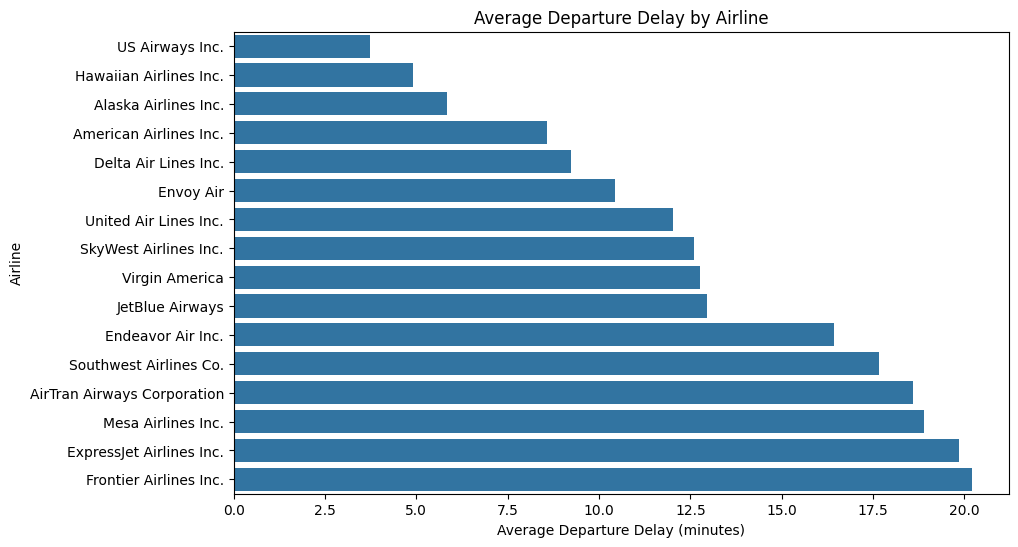

In [26]:
#Analysis: Airline Performance on Delays
airline_delays = df_cleaned.groupby('name')['dep_delay'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=airline_delays.values, y=airline_delays.index)
plt.title('Average Departure Delay by Airline')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Airline')
plt.show()
